Importação das Bibiliotecas e Upload do dataset abalone.csv

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt
import seaborn as sns

In [25]:
uploaded = files.upload()

for filename in uploaded.keys():

    dataset = pd.read_csv(filename)
    print(f"Arquivo {filename} carregado com sucesso!")
    print(dataset.head())

Saving abalone.csv to abalone (4).csv
Arquivo abalone (4).csv carregado com sucesso!
  Sex Length Diameter Height Whole weight Shucked weight Viscera weight  \
0   M  0,455    0,365  0,095        0,514         0,2245          0,101   
1   M   0,35    0,265   0,09       0,2255         0,0995         0,0485   
2   F   0,53     0,42  0,135        0,677         0,2565         0,1415   
3   M   0,44    0,365  0,125        0,516         0,2155          0,114   
4   I   0,33    0,255   0,08        0,205         0,0895         0,0395   

  Shell weight  Rings  
0         0,15     15  
1         0,07      7  
2         0,21      9  
3        0,155     10  
4        0,055      7  


Informações Estatísticas

In [23]:
dataset.describe(include=['object'])

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177,4177,4177,4177,4177,4177,4177,4177
unique,3,134,111,51,2429,1515,880,926
top,M,"0,625","0,45","0,15","0,2225","0,175","0,1715","0,275"
freq,1528,94,139,267,8,11,15,43


Gráficos Comparativos entre os Sexos

  Sex  Total_Height_Length
0   F                 5834
1   I                 5874
2   M                 6813


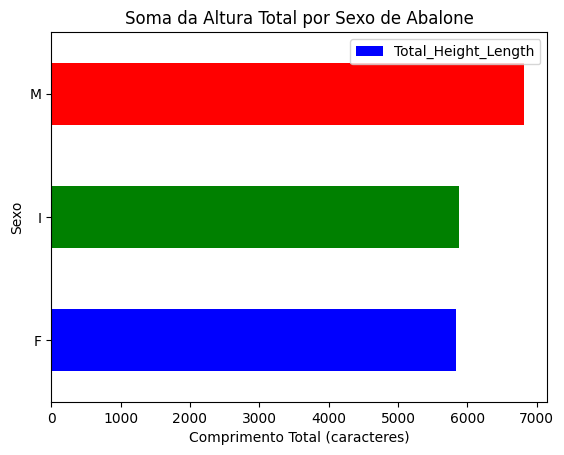

In [32]:
def concatenate_and_calculate_length(column_name):
    concatenated = dataset.groupby('Sex')[column_name].apply(lambda x: ''.join(x.astype(str))).reset_index()
    concatenated[f'Total_{column_name}_Length'] = concatenated[column_name].apply(len)
    return concatenated[['Sex', f'Total_{column_name}_Length']]

height_by_sex = concatenate_and_calculate_length('Height')
print(height_by_sex)
height_by_sex.plot(kind='barh', x='Sex', y=f'Total_Height_Length', color=['blue', 'green', 'red'])
plt.title('Soma da Altura Total por Sexo de Abalone')
plt.xlabel('Comprimento Total (caracteres)')
plt.ylabel('Sexo')
plt.show()

  Sex  Total_Length_Length
0   F                 5774
1   I                 5937
2   M                 6721


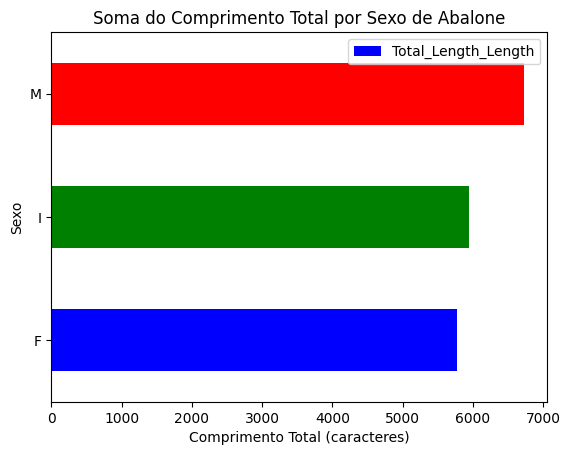

In [35]:
length_by_sex = concatenate_and_calculate_length('Length')
print(length_by_sex)
length_by_sex.plot(kind='barh', x='Sex', y=f'Total_Length_Length', color=['blue', 'green', 'red'])
plt.title('Soma do Comprimento Total por Sexo de Abalone')
plt.xlabel('Comprimento Total (caracteres)')
plt.ylabel('Sexo')
plt.show()

  Sex  Total_Diameter_Length
0   F                   5752
1   I                   5897
2   M                   6743


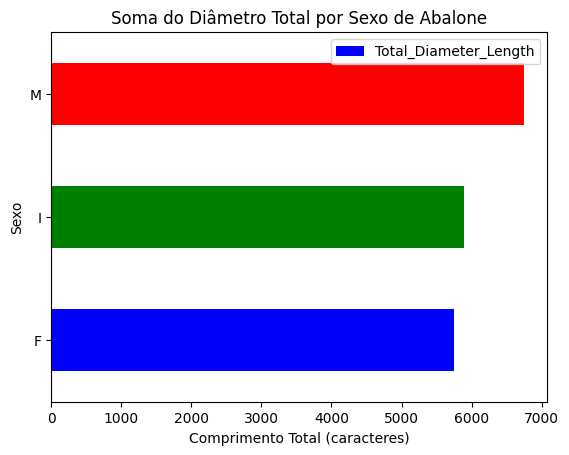

In [36]:
diameter_by_sex = concatenate_and_calculate_length('Diameter')
print(diameter_by_sex)
diameter_by_sex.plot(kind='barh', x='Sex', y=f'Total_Diameter_Length', color=['blue', 'green', 'red'])
plt.title('Soma do Diâmetro Total por Sexo de Abalone')
plt.xlabel('Comprimento Total (caracteres)')
plt.ylabel('Sexo')
plt.show()

  Sex  Total_Whole weight_Length
0   F                       7105
1   I                       7308
2   M                       8259


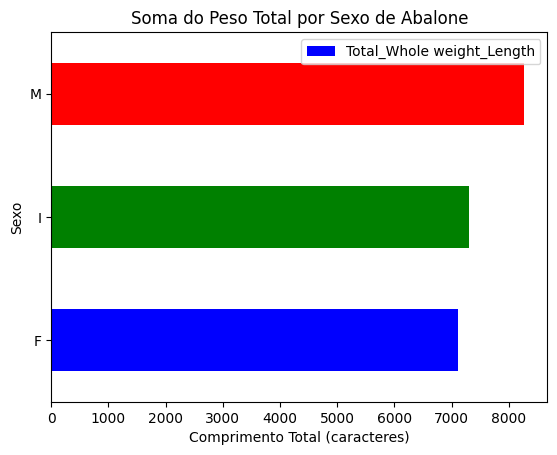

In [33]:
whole_weight_by_sex = concatenate_and_calculate_length('Whole weight')
print(whole_weight_by_sex)
whole_weight_by_sex.plot(kind='barh', x='Sex', y=f'Total_Whole weight_Length', color=['blue', 'green', 'red'])
plt.title('Soma do Peso Total por Sexo de Abalone')
plt.xlabel('Comprimento Total (caracteres)')
plt.ylabel('Sexo')
plt.show()

  Sex  Total_Rings_Length
0   F                2190
1   I                1589
2   M                2479


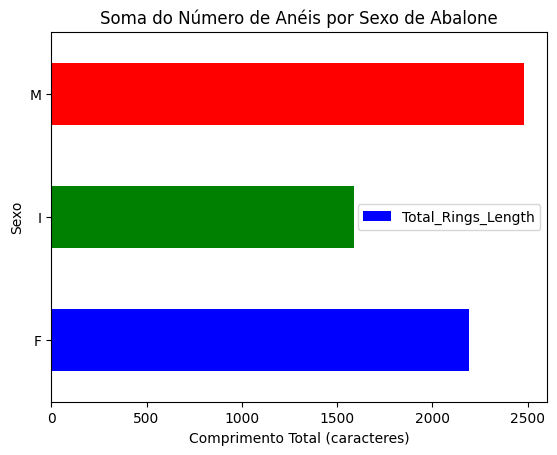

In [34]:
rings_by_sex = concatenate_and_calculate_length('Rings')
print(rings_by_sex)
rings_by_sex.plot(kind='barh', x='Sex', y=f'Total_Rings_Length', color=['blue', 'green', 'red'])
plt.title('Soma do Número de Anéis por Sexo de Abalone')
plt.xlabel('Comprimento Total (caracteres)')
plt.ylabel('Sexo')
plt.show()

Treinando e Separando as Variáveis

In [40]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset, test_size=0.20, random_state=1)
print('Train data points :', len(train))
print('Test data points :', len(test))

Train data points : 3341
Test data points : 836


In [44]:
numerical_columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
categorical_columns = ['Sex']

numerical_data = dataset[numerical_columns]
categorical_data = dataset[categorical_columns]

numerical_data['Age'] = numerical_data['Rings'] + 1.5

print("Dados Numéricos:")
print(numerical_data.head())
print(numerical_data.dtypes)

print("\nDados Não Numéricos:")
print(categorical_data.head())
print(categorical_data.dtypes)

features = pd.concat([categorical_data, numerical_data.drop(columns=['Rings'])], axis=1)
target = numerical_data['Age']

print("\nCaracterísticas (features):")
print(features.head())

print("\nAlvo (target - Age):")
print(target.head())


Dados Numéricos:
  Length Diameter Height Whole weight Shucked weight Viscera weight  \
0  0,455    0,365  0,095        0,514         0,2245          0,101   
1   0,35    0,265   0,09       0,2255         0,0995         0,0485   
2   0,53     0,42  0,135        0,677         0,2565         0,1415   
3   0,44    0,365  0,125        0,516         0,2155          0,114   
4   0,33    0,255   0,08        0,205         0,0895         0,0395   

  Shell weight  Rings   Age  
0         0,15     15  16.5  
1         0,07      7   8.5  
2         0,21      9  10.5  
3        0,155     10  11.5  
4        0,055      7   8.5  
Length             object
Diameter           object
Height             object
Whole weight       object
Shucked weight     object
Viscera weight     object
Shell weight       object
Rings               int64
Age               float64
dtype: object

Dados Não Numéricos:
  Sex
0   M
1   M
2   F
3   M
4   I
Sex    object
dtype: object

Características (features):
  Sex Length 

Histograma das Idades

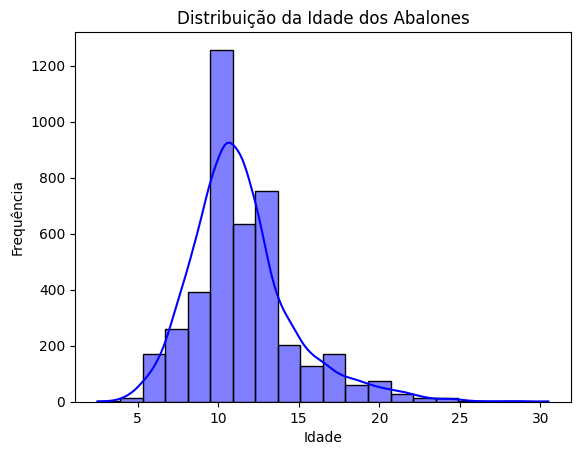

In [47]:
sns.histplot(numerical_data['Age'], bins=20, kde=True, color='blue')

plt.title('Distribuição da Idade dos Abalones')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.show()

Gráfico em Pizza de Categorização por Sexo

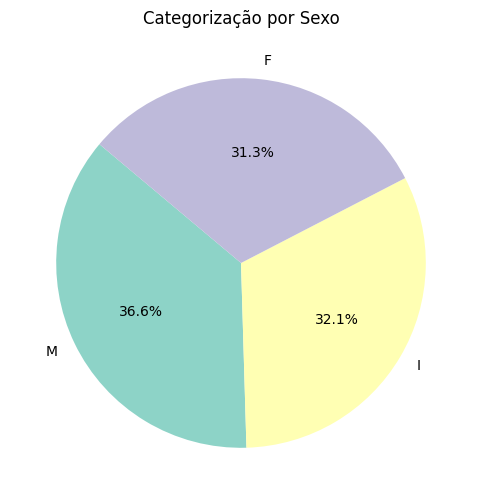

In [48]:
sex_counts = categorical_data['Sex'].value_counts()

plt.figure(figsize=(6, 6))
sns.set_palette('Set3')
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Categorização por Sexo')

plt.show()

Correlação de Pearson

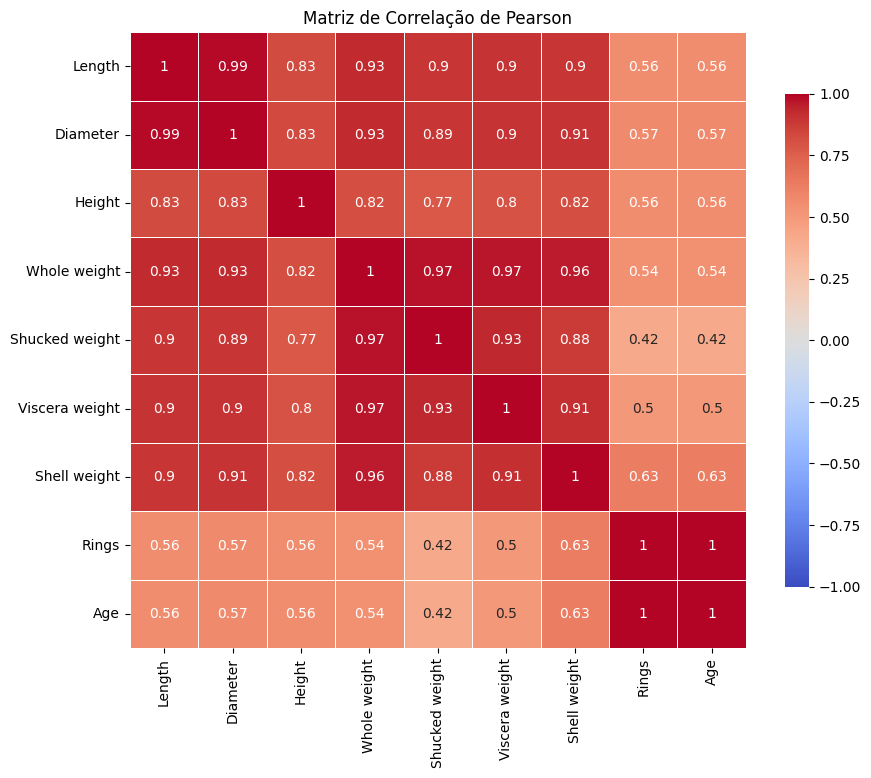

In [52]:
numerical_data = numerical_data.replace(',', '.', regex=True)

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Matriz de Correlação de Pearson')

plt.show()

Gráfico de Dispersão em relação a Idade

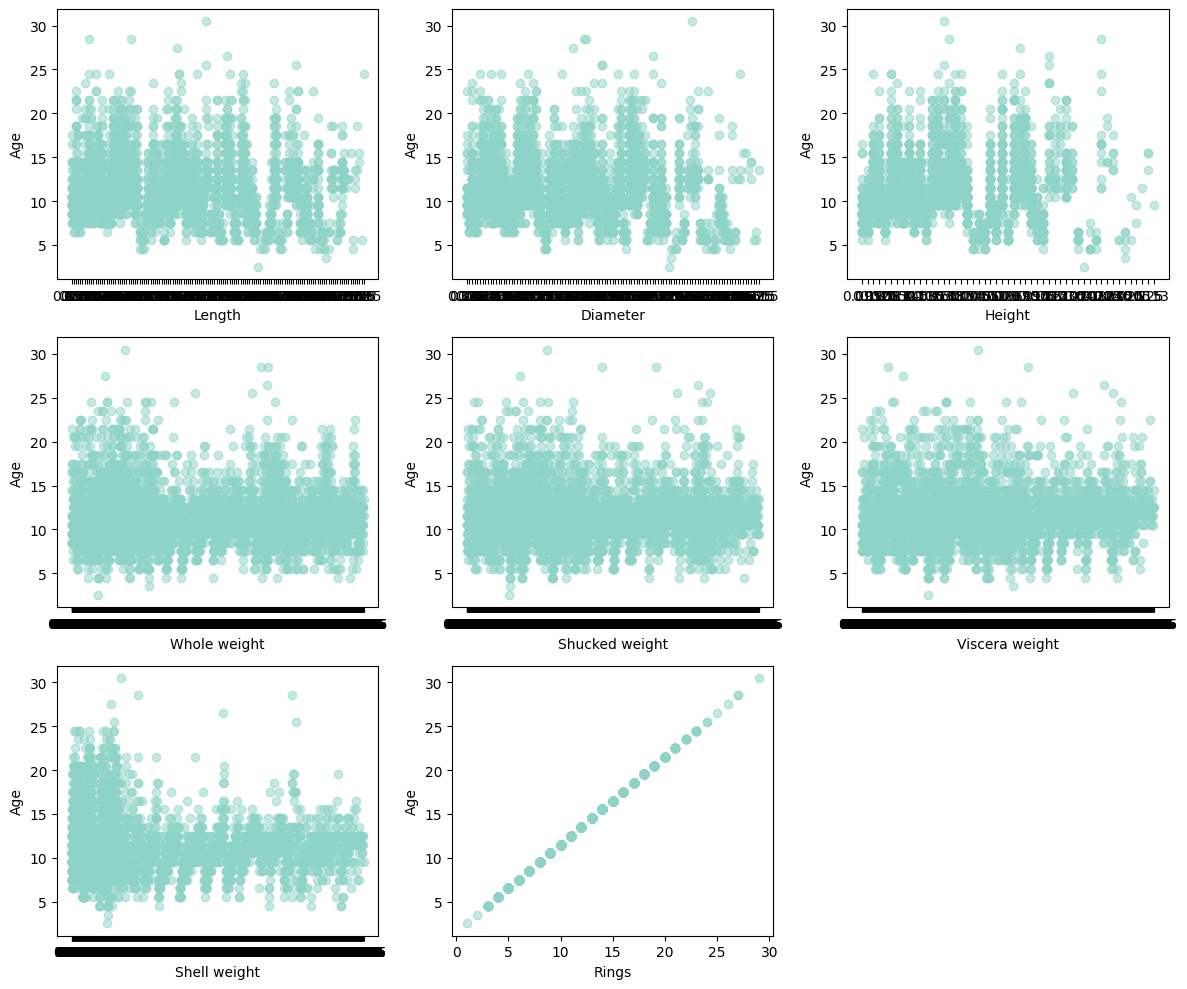

In [54]:
plt.figure(figsize=(12, 10))

for i, column in enumerate(numerical_data.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    plt.scatter(numerical_data[column], numerical_data['Age'], alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Age')

plt.tight_layout()
plt.show()

Treinamento e Acurácia

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Selecionar as variáveis relevantes
features = numerical_data[['Height', 'Whole weight', 'Diameter']]
target_rings = numerical_data['Rings']
target_age = numerical_data['Age']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train_rings, y_test_rings = train_test_split(features, target_rings, test_size=0.3, random_state=42)
_, _, y_train_age, y_test_age = train_test_split(features, target_age, test_size=0.3, random_state=42)

# Inicializar os modelos
models = {
    'XGBoost': {
        'rings': XGBRegressor(random_state=42),
        'age': XGBRegressor(random_state=42)
    },
    'RandomForest': {
        'rings': RandomForestRegressor(random_state=42),
        'age': RandomForestRegressor(random_state=42)
    },
    'DecisionTree': {
        'rings': DecisionTreeRegressor(random_state=42),
        'age': DecisionTreeRegressor(random_state=42)
    }
}

# Função para treinar e avaliar os modelos
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

for model_name, model_dict in models.items():
    print(f"\nModelo: {model_name}")
    model_rings = model_dict['rings']
    y_rings_pred = train_and_evaluate(model_rings, X_train, X_test, y_train_rings, y_test_rings)
    accuracy_rings = accuracy_score(y_test_rings.round(), y_rings_pred.round())  # Acurácia para Rings
    print(f"Acurácia para {model_name} (Rings): {accuracy_rings:.4f}")

    # Usar Rings preditos para prever Age
    model_age = model_dict['age']
    y_age_pred = train_and_evaluate(model_age, X_train, X_test, y_train_age, y_test_age)
    mse_age = mean_squared_error(y_test_age, y_age_pred)  # MSE para Age
    print(f"MSE para {model_name} (Age): {mse_age:.4f}")




Modelo: XGBoost
Acurácia para XGBoost (Rings): 0.1930
MSE para XGBoost (Age): 7.8803

Modelo: RandomForest
Acurácia para RandomForest (Rings): 0.1834
MSE para RandomForest (Age): 7.5643

Modelo: DecisionTree
Acurácia para DecisionTree (Rings): 0.1539
MSE para DecisionTree (Age): 12.2782


Predição da Idade com valores informados pelo usuário

In [96]:
Height = float(input("Entre com o valor de Height: "))
Whole_weight = float(input("Entre com o valor de Whole weight: "))
Diameter = float(input("Entre com o valor de Diameter: "))

user_input = {
    'Height': [Height],
    'Whole weight': [Whole_weight],
    'Diameter': [Diameter]
}

features = pd.DataFrame(user_input)

model_name = 'XGBoost'
model = models[model_name]
y_rings_pred = model_rings.predict(features)
y_age_pred = model_age.predict(features)

predicted_age = y_age_pred[0]

if predicted_age < 7.5:
    classificacao = 'novo'
elif predicted_age <= 14.5:
    classificacao = 'adulto'
else:
    classificacao = 'velho'

print(f"Idade predita com {model_name} é: {predicted_age:.2f} anos, sendo um abalone {classificacao}")


Entre com o valor de Height: 0.7
Entre com o valor de Whole weight: 0.650
Entre com o valor de Diameter: 0.350
Idade predita com XGBoost é: 9.50 anos, sendo um abalone adulto


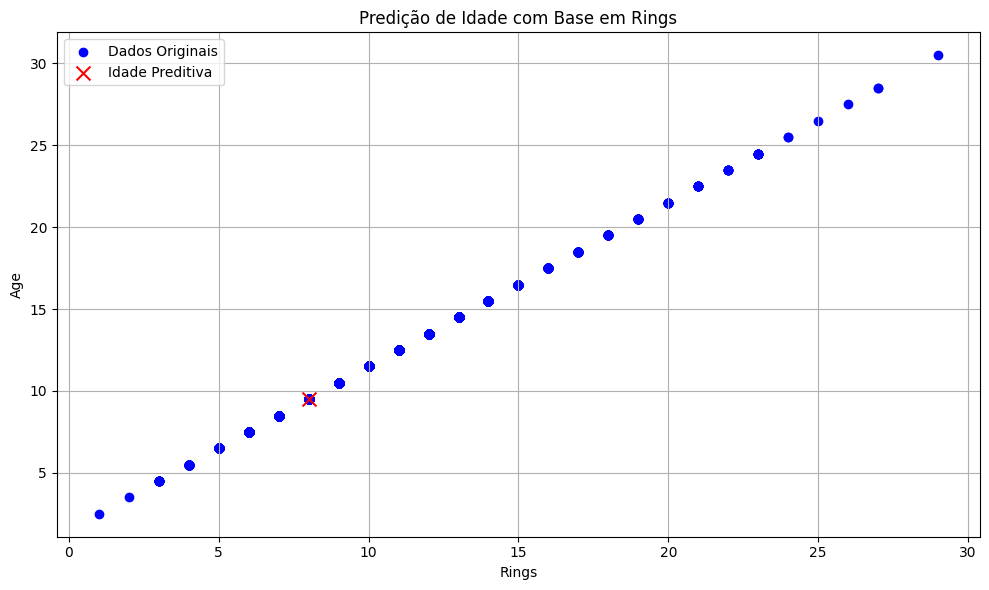

In [97]:
plt.figure(figsize=(10, 6))

plt.scatter(numerical_data['Rings'], numerical_data['Age'], color='blue', label='Dados Originais')

plt.scatter(y_rings_pred, predicted_age, color='red', label='Idade Preditiva', marker='x', s=100)

plt.xlabel('Rings')
plt.ylabel('Age')
plt.title('Predição de Idade com Base em Rings')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

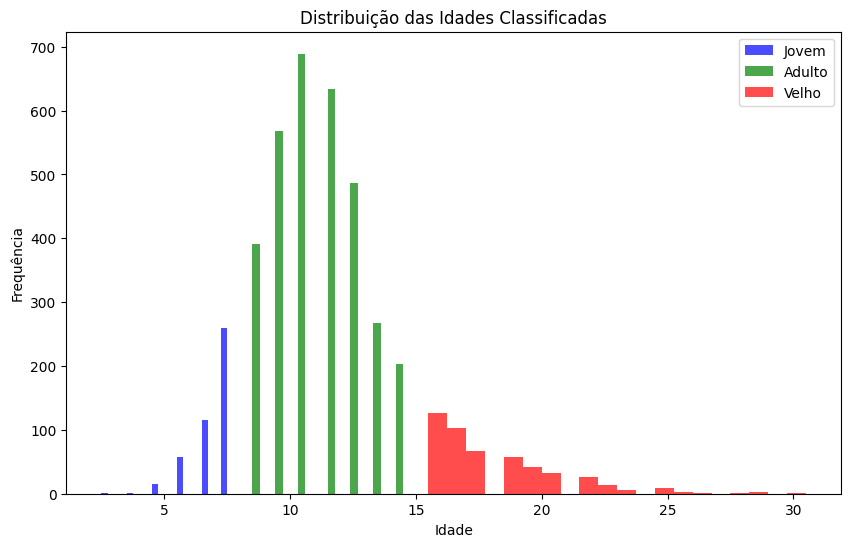

In [101]:
numerical_data['Age_Class'] = pd.cut(numerical_data['Age'], bins=[0, 7.5, 14.5, float('inf')], labels=['novo', 'adulto', 'velho'])

# Criar histogramas separados para cada classe de idade
plt.figure(figsize=(10, 6))

# Histograma para idades classificadas como "jovem"
plt.hist(numerical_data[numerical_data['Age_Class'] == 'novo']['Age'], bins=20, color='blue', alpha=0.7, label='Jovem')

# Histograma para idades classificadas como "adulto"
plt.hist(numerical_data[numerical_data['Age_Class'] == 'adulto']['Age'], bins=20, color='green', alpha=0.7, label='Adulto')

# Histograma para idades classificadas como "velho"
plt.hist(numerical_data[numerical_data['Age_Class'] == 'velho']['Age'], bins=20, color='red', alpha=0.7, label='Velho')

# Configurações do gráfico
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição das Idades Classificadas')
plt.legend()

# Exibir o histograma
plt.show()